<a href="https://colab.research.google.com/github/Pascalrjt/MachineLearningKClustering/blob/main/5025211072_heart_failure_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
import requests
import zipfile
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Downloading, unzipping and loading the dataset

In [ ]:
url = "https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip"

download_path = "heart_failure_clinical_records.zip"
extracted_folder = "heart_failure_clinical_records_dataset"

response = requests.get(url)
with open(download_path, 'wb') as file:
    file.write(response.content)

with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Loading the dataset
data = pd.read_csv(f'{extracted_folder}/heart_failure_clinical_records_dataset.csv')
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Data preprocessing:
  Standardize the continuous variable : platelents

In [ ]:
scaler = StandardScaler()
data['platelets'] = scaler.fit_transform(data[['platelets']])



Encoding the binary variables : anaemia, diabetes, sex, smoking

In [ ]:
# 2. Encode binary variables (anaemia, diabetes, sex, smoking)
data['anaemia'] = data['anaemia'].astype(int)
data['diabetes'] = data['diabetes'].astype(int)
data['sex'] = data['sex'].astype(int)
data['smoking'] = data['smoking'].astype(int)



Selecting features for clustering

In [ ]:
X = data[['age', 'anaemia', 'diabetes', 'platelets', 'sex', 'smoking']]



Performing k-clustering with a k value of 3

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(X)



Analyzing the results

In [ ]:
# Analyze the results
cluster_centers = kmeans.cluster_centers_
data['cluster'].value_counts()



1    184
2     70
0     45
Name: cluster, dtype: int64

In [ ]:
# You can now analyze and interpret the clusters
for i in range(k):
    print(f"Cluster {i + 1}:")
    print(data[data['cluster'] == i].describe())



Cluster 1:
             age    anaemia  creatinine_phosphokinase   diabetes  \
count  45.000000  45.000000                 45.000000  45.000000   
mean   60.481489   0.444444                564.511111   0.444444   
std    14.274112   0.502519               1211.098424   0.502519   
min    41.000000   0.000000                 23.000000   0.000000   
25%    50.000000   0.000000                104.000000   0.000000   
50%    58.000000   0.000000                212.000000   0.000000   
75%    70.000000   1.000000                582.000000   1.000000   
max    95.000000   1.000000               7702.000000   1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count          45.000000            45.000000      45.000000   
mean           39.666667             0.377778  429355.555556   
std            11.577800             0.490310  100803.399013   
min            17.000000             0.000000  348000.000000   
25%            30.000000             0.000000  368000.00

Visualizing the clusters where k = 3.

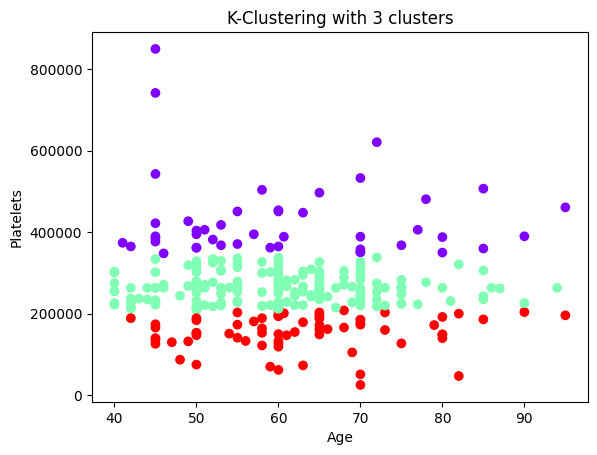

In [ ]:
plt.scatter(data['age'], data['platelets'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.title('K-Clustering with 3 clusters')
plt.show()

Visualizing the clusters where k = 6.

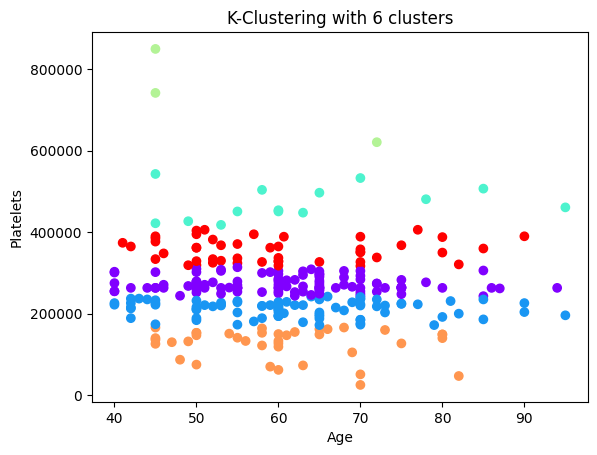

In [ ]:
# Perform k-means clustering with the chosen value of k
k = 6  # Adjust this based on your analysis
kmeans = KMeans(n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(X)

# Analyze the results
cluster_centers = kmeans.cluster_centers_
data['cluster'].value_counts()


# Visualize the clusters (for 2D data, e.g., age vs. platelets)
plt.scatter(data['age'], data['platelets'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.title('K-Clustering with 6 clusters')
plt.show()

Normalizing the data

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Performing K clustering with the data where k = 6 and visualising it.

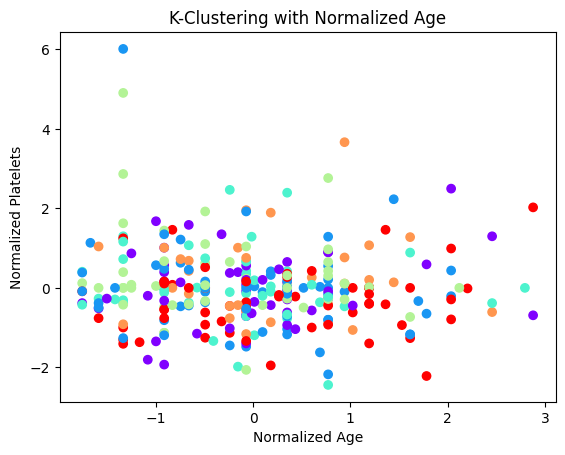

In [ ]:
# Perform k-means clustering with the chosen value of k
k = 6  # Adjust this based on your analysis
kmeans = KMeans(n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(X_normalized)

# Analyze the results
cluster_centers = kmeans.cluster_centers_
data['cluster'].value_counts()

# Visualize the clusters (for 2D data, e.g., age vs. platelets)
plt.scatter(X_normalized[:, 0], X_normalized[:, 3], c=data['cluster'], cmap='rainbow')
plt.xlabel('Normalized Age')
plt.ylabel('Normalized Platelets')
plt.title('K-Clustering with Normalized Age')
plt.show()